In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#importing library


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None)

In [109]:
bike=pd.read_csv("day.csv")
bike.head()
# reading csv

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [110]:
bike.info()
# checking dtype, shape an columns name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [111]:
# cchcking unique values
bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [112]:
# converting dtype of categorical columns
lis=['season','yr','mnth','weekday','weathersit','holiday','workingday']
bike[lis]=bike[lis].astype('object')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


In [113]:
# dropping dteday instant and casual and registered
#dteday and instant will not help in analysis
#cnt is derived from casual and registerd
bike=bike.drop(['instant','dteday','casual','registered'],1)

##### converting df according to data description

In [114]:
# converting season and weathersit year and month according to info provided in column description
season={1:'spring', 2:'summer', 3:'fall', 4:'winter'}

weathersit={ 1:'Clear', 2: 'Mist + Cloudy',
 3: 'Light Rain + Scattered clouds', 4: 'Heavy Rain + Thunderstorm'}
year={0:'2018',1:'2019'}

monthDict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
days={0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}


bike['season']=bike['season'].map(season)
bike['weathersit']=bike['weathersit'].map(weathersit)
bike['yr']=bike['yr'].map(year)
bike['mnth']=bike['mnth'].map(monthDict)
bike['weekday']=bike['weekday'].map(days)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [115]:
# checking null count in df
bike.isnull().sum()/len(bike)*100

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

In [116]:
bike.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


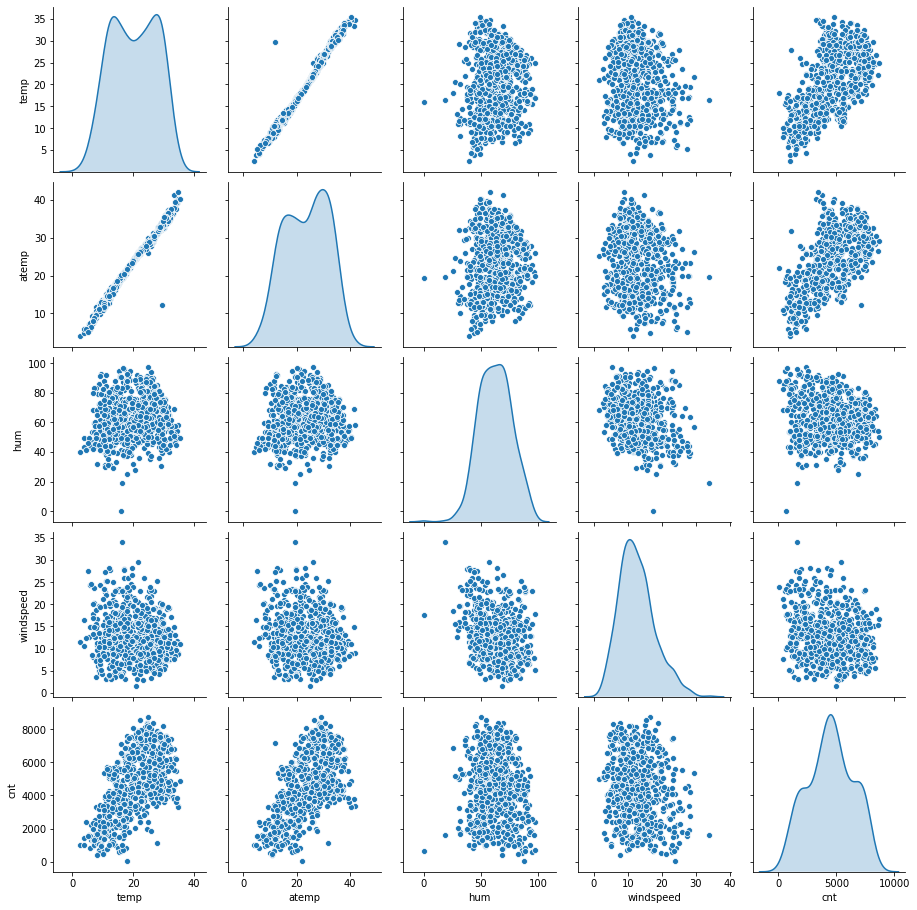

In [117]:
#pairplot of numerical columns 
sns.pairplot(bike, 
             vars = ['temp', 'atemp', 'hum', 'windspeed','cnt'],diag_kind ='kde')


plt.show()

`1` atemp and temp are correlated with each other.one need to be dropped

`2` hum,windspeed and cnt is normally distributed

In [118]:
# droppng atemp
bike=bike.drop('atemp',1)

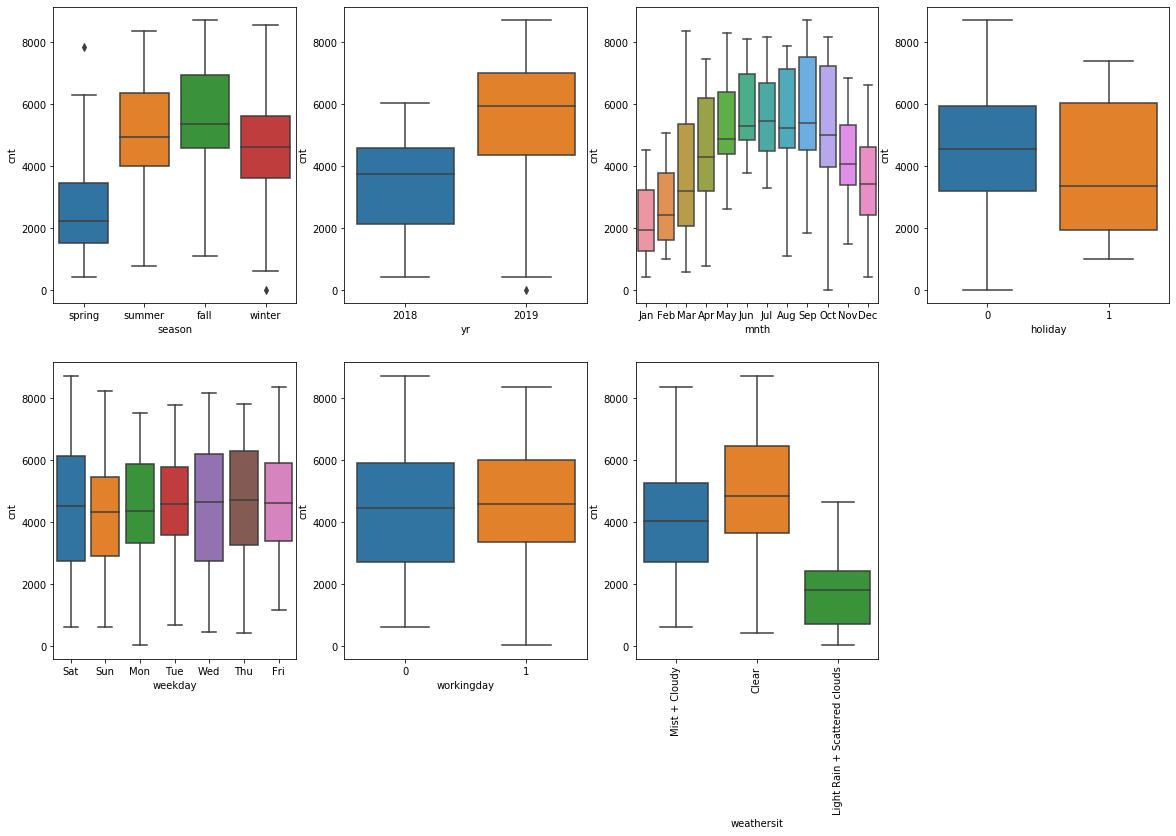

In [119]:
#plotting categorical columns

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.xticks(rotation=90)


plt.show()

`1` We can see some outliers season.which need to be handled

`2` In season *Fall and summer* demand is higher.

`3`In year *2019* more people rented bike.

`4` demand is increased in month between *march to sept*

`5` when weather is clear or mist+cloudy demand is high

### Creating dummy Variable

In [120]:
var=['season', 'yr', 'mnth', 'weekday',
       'weathersit']
dummy_var_df=pd.get_dummies(bike[var],drop_first=True)
print(dummy_var_df.info())
dummy_var_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   season_spring                             730 non-null    uint8
 1   season_summer                             730 non-null    uint8
 2   season_winter                             730 non-null    uint8
 3   yr_2019                                   730 non-null    uint8
 4   mnth_Aug                                  730 non-null    uint8
 5   mnth_Dec                                  730 non-null    uint8
 6   mnth_Feb                                  730 non-null    uint8
 7   mnth_Jan                                  730 non-null    uint8
 8   mnth_Jul                                  730 non-null    uint8
 9   mnth_Jun                                  730 non-null    uint8
 10  mnth_Mar                                  730 non-null    uint

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain + Scattered clouds,weathersit_Mist + Cloudy
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [121]:
# concat to bike dataframe
bike_1=pd.concat([bike,dummy_var_df],1)
bike_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain + Scattered clouds,weathersit_Mist + Cloudy
0,spring,2018,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [122]:
# dropping columns season,yr,workingday,weathersit
bike_1.drop(var,1,inplace=True)
bike_1.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain + Scattered clouds,weathersit_Mist + Cloudy
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [123]:
bike_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   holiday                                   730 non-null    object 
 1   workingday                                730 non-null    object 
 2   temp                                      730 non-null    float64
 3   hum                                       730 non-null    float64
 4   windspeed                                 730 non-null    float64
 5   cnt                                       730 non-null    int64  
 6   season_spring                             730 non-null    uint8  
 7   season_summer                             730 non-null    uint8  
 8   season_winter                             730 non-null    uint8  
 9   yr_2019                                   730 non-null    uint8  
 10  mnth_Aug                              

In [124]:
# converting dtpye of holiday working day to uint8  
var=['holiday','workingday']
bike_1[var]=bike_1[var].astype('uint8')

### Building model

###### splitting Data into Test and Train

In [125]:
df_train,df_test=train_test_split(bike_1,test_size=0.3,random_state=100)


###### rescaling train dataset

In [126]:

scaler=MinMaxScaler()

In [127]:
num_vars=['temp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain + Scattered clouds,weathersit_Mist + Cloudy
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [128]:
df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain + Scattered clouds,weathersit_Mist + Cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.025440,0.677104,0.537386,0.650333,0.320844,0.514186,0.242661,0.246575,0.248532,0.508806,0.095890,0.084149,0.066536,0.088063,0.076321,0.076321,0.097847,0.084149,0.086106,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.344423
std,0.157613,0.468042,0.225640,0.145741,0.169639,0.224737,0.429112,0.431440,0.432585,0.500412,0.294729,0.277883,0.249461,0.283664,0.265771,0.265771,0.297399,0.277883,0.280795,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.475645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.341151,0.538858,0.199179,0.356765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542077,0.653499,0.298098,0.519673,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.754401,0.414438,0.688737,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


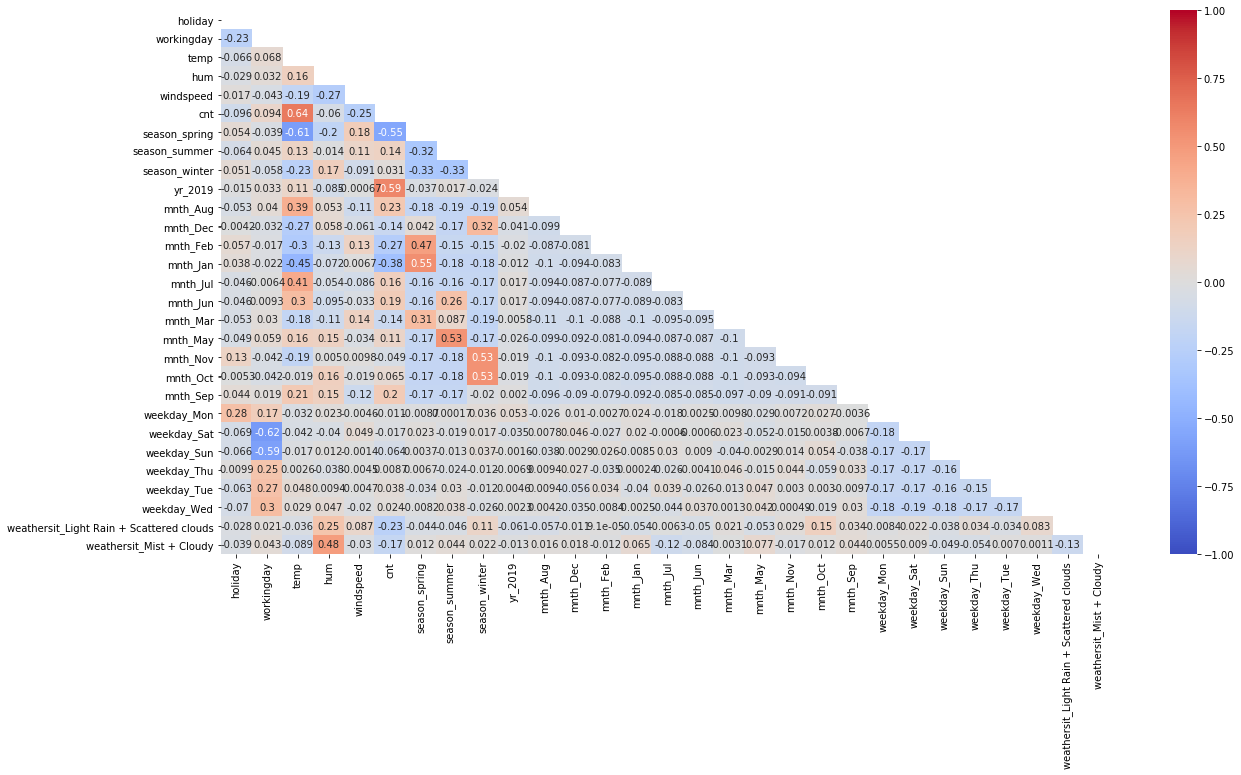

In [129]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 10))

mask = np.zeros(df_train.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(df_train.corr(), annot = True, vmin=-1,cmap='coolwarm',mask=mask)
plt.show()

###### Some variable have correlation more than +-0.5 hence they can create multicollnearity we will check vif and choose feature according to it

In [130]:
# creating and x and y
y_train = df_train.pop('cnt')
X_train = df_train

In [131]:
# applying Rfe to 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [132]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 12),
 ('weathersit_Light Rain + Scattered clouds', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [133]:
# getting columns suggested by rfe
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'mnth_Jan', 'mnth_Jul',
       'mnth_Sep', 'weekday_Sat', 'weathersit_Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [134]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [135]:
X_train= X_train[col]

In [136]:

X_train_lm=sm.add_constant(X_train)
lr_1=sm.OLS(y_train,X_train_lm).fit()

In [137]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.50e-191
Time:                        15:52:55   Log-Likelihood:                 520.05
No. Observations:                 511   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -940.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2514      0.036      6.946      0.000       0.180       0.322
holiday                                     -0.0583      0.027     -2.166      0.031      -0.111      -0.005
workingday                                   0.0438      0.012      3.799      0.000       0.021       0.066
temp                                         0.5106      0.034     14.850      0.000       0.443       0.578
hum                                         -0.1572      0.037     -4.209      0.000      -0.231      -0.084
windspeed                                   -0.1863      0.026     -7.302      0.000      -0.236      -0.136
season_spring                               -0.0505      0.021     -2.444      0.015      -0.091      -0.010
season_summer                                0.0509      0.015      3.428      0.001       0.022       0.080
season_winter                                0.0947      0.017      5.487      0.000       0.061       0.129
yr_2019                                      0.2310      0.008     28.839      0.000       0.215       0.247
mnth_Jan                                    -0.0343      0.017     -1.977      0.049      -0.068      -0.000
mnth_Jul                                    -0.0531      0.018     -2.939      0.003      -0.089      -0.018
mnth_Sep                                     0.0812      0.016      4.928      0.000       0.049       0.114
weekday_Sat                                  0.0536      0.015      3.694      0.000       0.025       0.082
weathersit_Light Rain + Scattered clouds    -0.2479      0.026     -9.513      0.000      -0.299      -0.197
weathersit_Mist + Cloudy                    -0.0566      0.010     -5.463      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.238   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.707
Skew:                          -0.677   Prob(JB):                     2.09e-35
Kurtosis:                       5.381   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
# function to calculate vif
def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [140]:
vifcalc(X_train)

,Features,VIF
3,hum,29.39
2,temp,17.80
1,workingday,5.32
4,windspeed,4.73
5,season_spring,4.53
7,season_winter,3.48
6,season_summer,2.85
14,weathersit_Mist + Cloudy,2.29
8,yr_2019,2.09
12,weekday_Sat,1.98


In [141]:
X_train=X_train.drop('hum',1)
# removing workingday because of high p 

In [142]:
X_train_lm=sm.add_constant(X_train)
lr_2=sm.OLS(y_train,X_train_lm).fit()
# again building model

In [143]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     190.0
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          6.18e-189
Time:                        15:53:34   Log-Likelihood:                 511.07
No. Observations:                 511   AIC:                            -992.1
Df Residuals:                     496   BIC:                            -928.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1726      0.031      5.481      0.000       0.111       0.234
holiday                                     -0.0559      0.027     -2.043      0.042      -0.110      -0.002
workingday                                   0.0469      0.012      4.006      0.000       0.024       0.070
temp                                         0.4730      0.034     14.012      0.000       0.407       0.539
windspeed                                   -0.1561      0.025     -6.271      0.000      -0.205      -0.107
season_spring                               -0.0596      0.021     -2.849      0.005      -0.101      -0.018
season_summer                                0.0446      0.015      2.970      0.003       0.015       0.074
season_winter                                0.0798      0.017      4.644      0.000       0.046       0.114
yr_2019                                      0.2350      0.008     29.057      0.000       0.219       0.251
mnth_Jan                                    -0.0390      0.018     -2.216      0.027      -0.074      -0.004
mnth_Jul                                    -0.0481      0.018     -2.621      0.009      -0.084      -0.012
mnth_Sep                                     0.0752      0.017      4.507      0.000       0.042       0.108
weekday_Sat                                  0.0584      0.015      3.970      0.000       0.029       0.087
weathersit_Light Rain + Scattered clouds    -0.2915      0.024    -11.993      0.000      -0.339      -0.244
weathersit_Mist + Cloudy                    -0.0817      0.009     -9.485      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       67.777   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.366
Skew:                          -0.690   Prob(JB):                     2.03e-36
Kurtosis:                       5.411   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
vifcalc(X_train)

,Features,VIF
2,temp,7.08
1,workingday,5.26
3,windspeed,4.68
4,season_spring,3.07
5,season_summer,2.34
7,yr_2019,2.08
6,season_winter,1.99
11,weekday_Sat,1.97
8,mnth_Jan,1.62
9,mnth_Jul,1.59


In [145]:
X_train=X_train.drop('workingday',1)
# removing working day because temp is good predicter and correlated to cnt
X_train_lm=sm.add_constant(X_train)
lr_3=sm.OLS(y_train,X_train_lm).fit()
# builidng third model

In [146]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.12e-186
Time:                        15:54:10   Log-Likelihood:                 502.93
No. Observations:                 511   AIC:                            -977.9
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2113      0.030      6.945      0.000       0.152       0.271
holiday                                     -0.0939      0.026     -3.606      0.000      -0.145      -0.043
temp                                         0.4742      0.034     13.842      0.000       0.407       0.542
windspeed                                   -0.1569      0.025     -6.210      0.000      -0.207      -0.107
season_spring                               -0.0612      0.021     -2.883      0.004      -0.103      -0.019
season_summer                                0.0438      0.015      2.872      0.004       0.014       0.074
season_winter                                0.0769      0.017      4.418      0.000       0.043       0.111
yr_2019                                      0.2353      0.008     28.664      0.000       0.219       0.251
mnth_Jan                                    -0.0384      0.018     -2.146      0.032      -0.074      -0.003
mnth_Jul                                    -0.0510      0.019     -2.744      0.006      -0.088      -0.014
mnth_Sep                                     0.0760      0.017      4.483      0.000       0.043       0.109
weekday_Sat                                  0.0198      0.011      1.754      0.080      -0.002       0.042
weathersit_Light Rain + Scattered clouds    -0.2866      0.025    -11.631      0.000      -0.335      -0.238
weathersit_Mist + Cloudy                    -0.0799      0.009     -9.144      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       66.075   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.268
Skew:                          -0.713   Prob(JB):                     1.28e-31
Kurtosis:                       5.155   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
vifcalc(X_train)

,Features,VIF
1,temp,5.17
2,windspeed,4.65
3,season_spring,2.76
4,season_summer,2.24
6,yr_2019,2.08
5,season_winter,1.80
7,mnth_Jan,1.61
8,mnth_Jul,1.59
12,weathersit_Mist + Cloudy,1.56
9,mnth_Sep,1.34


In [148]:
X_train=X_train.drop('weekday_Sat',1)
X_train_lm=sm.add_constant(X_train)
lr_4=sm.OLS(y_train,X_train_lm).fit()
# removing weekday_mon because of high p and building 4th model

In [149]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.7
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          3.46e-187
Time:                        15:54:44   Log-Likelihood:                 501.35
No. Observations:                 511   AIC:                            -976.7
Df Residuals:                     498   BIC:                            -921.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2147      0.030      7.055      0.000       0.155       0.274
holiday                                     -0.0973      0.026     -3.737      0.000      -0.148      -0.046
temp                                         0.4730      0.034     13.779      0.000       0.406       0.540
windspeed                                   -0.1548      0.025     -6.121      0.000      -0.204      -0.105
season_spring                               -0.0614      0.021     -2.887      0.004      -0.103      -0.020
season_summer                                0.0435      0.015      2.847      0.005       0.013       0.073
season_winter                                0.0771      0.017      4.417      0.000       0.043       0.111
yr_2019                                      0.2348      0.008     28.565      0.000       0.219       0.251
mnth_Jan                                    -0.0381      0.018     -2.126      0.034      -0.073      -0.003
mnth_Jul                                    -0.0506      0.019     -2.715      0.007      -0.087      -0.014
mnth_Sep                                     0.0762      0.017      4.486      0.000       0.043       0.110
weathersit_Light Rain + Scattered clouds    -0.2861      0.025    -11.588      0.000      -0.335      -0.238
weathersit_Mist + Cloudy                    -0.0798      0.009     -9.113      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.917   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.728
Skew:                          -0.638   Prob(JB):                     5.55e-30
Kurtosis:                       5.168   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
vifcalc(X_train)

,Features,VIF
1,temp,5.14
2,windspeed,4.62
3,season_spring,2.75
4,season_summer,2.24
6,yr_2019,2.08
5,season_winter,1.79
7,mnth_Jan,1.61
8,mnth_Jul,1.59
11,weathersit_Mist + Cloudy,1.56
9,mnth_Sep,1.34


In [151]:
X_train=X_train.drop('windspeed',1)
X_train_lm=sm.add_constant(X_train)
lr_5=sm.OLS(y_train,X_train_lm).fit()
# removing mnth_Jan because of its so close to .05 p-value

In [152]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.50e-180
Time:                        15:55:05   Log-Likelihood:                 482.82
No. Observations:                 511   AIC:                            -941.6
Df Residuals:                     499   BIC:                            -890.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1580      0.030      5.261      0.000       0.099       0.217
holiday                                     -0.1004      0.027     -3.724      0.000      -0.153      -0.047
temp                                         0.4922      0.035     13.902      0.000       0.423       0.562
season_spring                               -0.0731      0.022     -3.333      0.001      -0.116      -0.030
season_summer                                0.0345      0.016      2.191      0.029       0.004       0.065
season_winter                                0.0805      0.018      4.455      0.000       0.045       0.116
yr_2019                                      0.2335      0.009     27.434      0.000       0.217       0.250
mnth_Jan                                    -0.0239      0.018     -1.297      0.195      -0.060       0.012
mnth_Jul                                    -0.0515      0.019     -2.668      0.008      -0.089      -0.014
mnth_Sep                                     0.0808      0.018      4.598      0.000       0.046       0.115
weathersit_Light Rain + Scattered clouds    -0.3008      0.025    -11.818      0.000      -0.351      -0.251
weathersit_Mist + Cloudy                    -0.0783      0.009     -8.643      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       68.398   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.903
Skew:                          -0.692   Prob(JB):                     3.47e-37
Kurtosis:                       5.443   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
vifcalc(X_train)

,Features,VIF
1,temp,4.29
5,yr_2019,2.07
2,season_spring,1.99
3,season_summer,1.94
6,mnth_Jan,1.60
7,mnth_Jul,1.59
4,season_winter,1.58
10,weathersit_Mist + Cloudy,1.56
8,mnth_Sep,1.34
9,weathersit_Light Rain + Scattered clouds,1.07


In [154]:
X_train=X_train.drop('mnth_Jan',1)
X_train_lm=sm.add_constant(X_train)
lr_6=sm.OLS(y_train,X_train_lm).fit()
# removing windspeed becoz of vif is near to 5, temp is good predictor and removing temp can significantly decrease r2.

In [155]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.9
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.21e-181
Time:                        15:55:38   Log-Likelihood:                 481.96
No. Observations:                 511   AIC:                            -941.9
Df Residuals:                     500   BIC:                            -895.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1495      0.029      5.098      0.000       0.092       0.207
holiday                                     -0.1007      0.027     -3.735      0.000      -0.154      -0.048
temp                                         0.5037      0.034     14.676      0.000       0.436       0.571
season_spring                               -0.0763      0.022     -3.495      0.001      -0.119      -0.033
season_summer                                0.0367      0.016      2.345      0.019       0.006       0.068
season_winter                                0.0843      0.018      4.721      0.000       0.049       0.119
yr_2019                                      0.2331      0.009     27.386      0.000       0.216       0.250
mnth_Jul                                    -0.0526      0.019     -2.724      0.007      -0.090      -0.015
mnth_Sep                                     0.0809      0.018      4.604      0.000       0.046       0.115
weathersit_Light Rain + Scattered clouds    -0.2996      0.025    -11.770      0.000      -0.350      -0.250
weathersit_Mist + Cloudy                    -0.0789      0.009     -8.715      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       67.019   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.522
Skew:                          -0.679   Prob(JB):                     1.88e-36
Kurtosis:                       5.426   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
vifcalc(X_train)

,Features,VIF
1,temp,4.22
5,yr_2019,2.07
3,season_summer,1.94
4,season_winter,1.58
6,mnth_Jul,1.58
9,weathersit_Mist + Cloudy,1.55
2,season_spring,1.40
7,mnth_Sep,1.34
8,weathersit_Light Rain + Scattered clouds,1.07
0,holiday,1.04


`lr_6` model final model because of p-value and vif is under the threesold


### Residual Analysis of the train data

In [157]:
y_train_cnt = lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

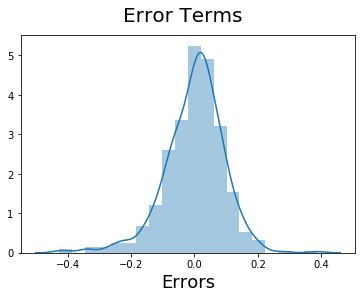

In [158]:
residual=y_train - y_train_cnt
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Here we can see error term is normally distributed and according to assumption its correct

Text(0, 0.5, 'residual')

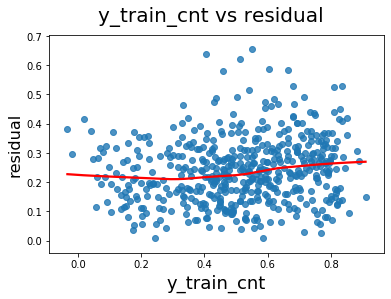

In [159]:
# checking for heteroscedastic data
fig=plt.figure()
sns.regplot(x=y_train_cnt, y=np.sqrt(np.abs(residual)), lowess=True, line_kws={'color': 'red'})
fig.suptitle('y_train_cnt vs residual', fontsize = 20)              # Plot heading 
plt.xlabel('y_train_cnt', fontsize = 18)                          # X-label
plt.ylabel('residual', fontsize = 16) 


### We Can't see any visiible pattern

###  Making Predictions Using the Final Model

In [160]:
num_vars=['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
# scaling value in test model

In [161]:
df_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain + Scattered clouds,weathersit_Mist + Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [162]:
y_test = df_test.pop('cnt')
X_test = df_test
# creating y and X 

In [163]:
# making dataframe with columns present in final train dataset
X_test=X_test[X_train.columns]

In [164]:
X_test_x=sm.add_constant(X_test)

In [165]:
y_pred = lr_6.predict(X_test_x)

### Model Evaluation

Text(0, 0.5, 'y_pred')

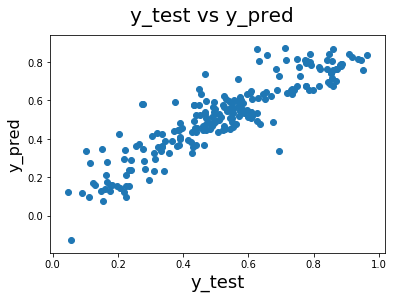

In [166]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [167]:
print(round(r2_score(y_test, y_pred),2))

0.81


#### r2 in train: 82

#### r2 in test: 81

We can see that the equation:

$ cnt =  0.1495	+ 0.5037\times temp   - 0.1007  \times  holiday -0.0763 \times season_spring + 0.0367  \times season_summer + 0.0843 \times season_winter + 0.2331 \times yr_2019 - 0.0526 \times mnth_Jul + 0.0809 \times mnth_Sep - 0.2996 \times weathersit Light Rain + Scattered clouds -0.0789 \times weathersit Mist + Cloudy $


### Conclusion:-
`1` holiday, season spring, month july weather like raining and mist and cloudy effect negatively. i.e:- if there is holiday and seaon is spring and raining then demand for bike will  decrease.

`2`temp, season summer, month sep, year 2019 these feature increase the demand.i.e:- if temperature is good, season is summer then demand will increase


### Suggestion for company:-
`1` In season summer, winter the demand will increase while in season spring demand can decrease, hence company should focus on spring  and provide offers to attract more customers

`2` when there is holiday demand decrease maybe becoz of people go to work with renting bike hence company can provide some offer or discount in holidays to attract customers

`3` weather situation like raining and mist cloudy will decrease demand.
